In [22]:
import numpy as np
import pandas as pd
import notebook
import sys
from icecube import astro
sys.path.append('/home/apizzuto/Nova/scripts/')
from Novae import Nova
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
?Nova

In [18]:
df.columns

Index([u'Name', u'Class', u'Distance (kpc)', u'Start Time (gamma ray)',
       u'Duration (gamma ray)', u'Peak Date (optical)', u'RA (Deg)',
       u'Dec. (Deg)', u'SPL gamma', u'SPL gamma error', u'SPL integrated flux',
       u'SPL integrated flux error', u'SPL flux', u'SPL flux error',
       u'EPL gamma', u'EPL gamma error', u'EPL cutoff ', u'EPL cutoff error',
       u'EPL integrated flux', u'EPL integrated flux error', u'EPL flux',
       u'EPL flux error', u'Source', u'Notes'],
      dtype='object')

In [16]:
df

Name  Class  Distance (kpc)  \
0                       V407 Cyg 2010    NaN             2.7   
1                      V1324 Sco 2012    NaN             4.5   
2                       V959 Mon 2012    NaN             3.6   
3                       V339 Del 2013    NaN             4.2   
4                      V1369 Cen 2013    NaN             2.5   
5                      V5668 Sgr 2015    NaN             2.0   
6                            V679 Car    NaN             2.9   
7                           V1535 Sco    NaN             7.3   
8                         ASASSN-16ma    NaN             4.2   
9                            V392 Per    NaN             3.9   
10             ASASSN-18fv (V906 Car)    NaN             NaN   
11  PNV J11261220-6531086  (Mus 2018)    NaN             NaN   
12             ASASSN-17mt (V549 Vel)    NaN             NaN   
13  V5855 Sgr (TCP J18102829-2729590)    NaN             NaN   
14             V407 Lup (ASASSN-16kt)    NaN             NaN   

    Start Time (gamma ray)  Duration (gamma ray)  Peak Date (optical)  \
0             55265.000000                    22           2010-03-10   
1             56093.000000                    17           2012-06-19   
2             56097.000000                    22                  NaN   
3             56520.000000                    27           2013-08-16   
4             56628.410000                    39            2013-12-5   
5             57096.634000                    55           2015-03-21   
6             58401.999988                    35                  NaN   
7             57063.999965                     7                  NaN   
8             57700.000000                    15  2016-11-07 22:48:00   
9             58238.000000                     1                  NaN   
10            58226.000000                     5                  NaN   
11            58129.000000                     8                  NaN   
12            58050.000000                    20                  NaN   
13            57689.000000                     5                  NaN   
14            57657.000000                     3                  NaN   

    RA (Deg)  Dec. (Deg)  SPL gamma  SPL gamma error  ...  EPL gamma  \
0   315.5409     45.7758       2.11             0.06  ...       1.23   
1   267.7246    -32.6224       2.16             0.09  ...       1.77   
2    99.9108      5.8980       2.34             0.09  ...       1.69   
3   305.8792     20.7681       2.26             0.08  ...       1.72   
4   208.6958    -59.1522       2.37             0.09  ...       1.84   
5     5.3799    -28.9283       2.42             0.13  ...       2.27   
6   168.4742    -61.2300        NaN              NaN  ...       1.30   
7   255.8590     35.0716       2.30             0.30  ...       1.90   
8   275.2177    -28.3700       2.11             0.05  ...       1.86   
9    70.8390     47.3572       1.90             0.20  ...       1.90   
10  159.0643    -59.5983       2.20             0.20  ...       1.90   
11  171.5508    -65.5191       2.20             0.20  ...       1.90   
12  132.6234    -47.7579       1.90             0.20  ...       1.90   
13  272.6179    -27.4997       2.20             0.20  ...       1.90   
14  232.2576    -44.8280       2.20             0.20  ...       1.90   

    EPL gamma error  EPL cutoff   EPL cutoff error  EPL integrated flux  \
0              0.20         1.44              0.36                 4.30   
1              0.68         4.10              6.14                 4.93   
2              0.25         1.45              0.61                 4.13   
3              0.24         1.94              0.95                 1.93   
4              0.23         2.30              1.00                 2.11   
5              0.25         9.00             14.00                 1.09   
6              0.80         2.60              2.00                 1.90   
7              0.08         4.30              1.20                 1.00   
8          

In [11]:
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')

In [47]:
novae = []
for index, row in df.iterrows():
    a = Nova(index, -1*row['EPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['EPL flux']*1e-7, cutoff = row['EPL cutoff '])
    novae.append(a)

(1e-15, 5e-05)

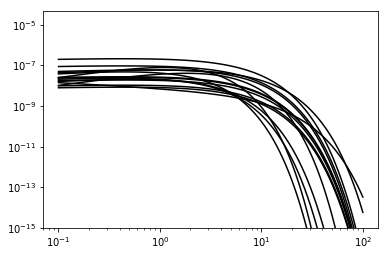

In [48]:
ens = np.logspace(-1., 2., 100)
for nova in novae:
    spec = nova.spectrum(ens)
    plt.plot(ens, ens**2*spec, c = 'k')
    
plt.loglog()
plt.ylim(1e-15, 5e-5)

In [42]:
novae = []
for index, row in df.iterrows():
    a = Nova(index, -1.*row['SPL gamma'], np.radians(row['RA (Deg)']), np.radians(row['Dec. (Deg)']), 
                row['Start Time (gamma ray)'], row['Duration (gamma ray)'], flux_norm=row['SPL flux']*1e-7, cutoff = None)
    novae.append(a)

(1e-12, 5e-05)

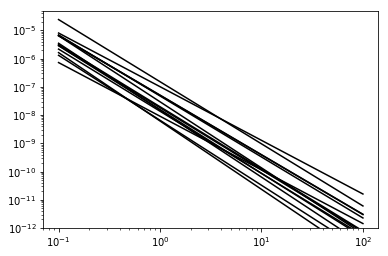

In [45]:
ens = np.logspace(-1., 2., 100)
for nova in novae:
    spec = nova.spectrum(ens)
    plt.plot(ens, spec, c = 'k')
    
plt.loglog()
plt.ylim(1e-12, 5e-5)

(10.68, -9.560000000000002, 0.4743416490252569, 2.7248853186877424, -1.125)


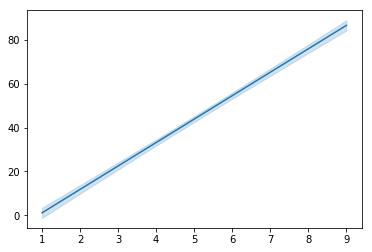

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1
x = np.array([1.,3.,5.,7.,9.])
y = np.array([2.2, 21., 40., 73., 83.])
sigma = 3.

x_bar = np.sum(x) / 5
y_bar = np.sum(y) / 5
xy_bar = np.sum(x*y) / 5
x_sq_bar = np.sum(x**2) / 5

m_hat = (xy_bar - x_bar * y_bar) / (x_sq_bar - x_bar ** 2)
c_hat = y_bar - m_hat * x_bar

sigma_m = np.sqrt((sigma ** 2) / (5 * (x_sq_bar - (x_bar ** 2))))
sigma_c = np.sqrt(((sigma ** 2) * x_sq_bar) / (5 * (x_sq_bar - (x_bar ** 2))))
cov_m_c = -((sigma ** 2) * x_bar) / (5 * (x_sq_bar - (x_bar ** 2)))

print(m_hat, c_hat, sigma_m, sigma_c, cov_m_c)

model_x = np.linspace(1,9,100)
model_y = m_hat * model_x + c_hat
plt.plot(model_x,model_y,'C0')

y_plus = model_y + np.sqrt(sigma_c ** 2 + sigma_m ** 2 * model_x ** 2 + 2 * model_x * cov_m_c)
y_minus = model_y - np.sqrt(sigma_c ** 2 + sigma_m ** 2 * model_x ** 2 + 2 * model_x * cov_m_c)

#plt.plot(model_x,y_plus,'C0')
#plt.plot(model_x,y_minus,'C0')
plt.fill_between(model_x, y_plus, y_minus, color='C0', alpha=0.2)

#plt.plot(x,y,'k')

plt.show()